# Data Science Project - Data Preprocessing

## import libraries

In [2]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
import numpy as np
!pip install xlsx2csv

## Crime and Resilience dataset:

In [4]:
df_crime = pl.read_excel("global_oc_index.xlsx",sheet_id=3)

In [5]:
df_crime

shape: (193, 33)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Continent ┆ Region    ┆ Country   ┆ Criminali ┆ … ┆ Economic  ┆ Victim    ┆ Preventio ┆ Non-stat │
│ ---       ┆ ---       ┆ ---       ┆ ty        ┆   ┆ regulator ┆ and       ┆ n         ┆ e actors │
│ str       ┆ str       ┆ str       ┆ ---       ┆   ┆ y         ┆ witness   ┆ ---       ┆ ---      │
│           ┆           ┆           ┆ f64       ┆   ┆ capacity  ┆ support   ┆ f64       ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ ---       ┆ ---       ┆           ┆          │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆ f64       ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Asia      ┆ Western   ┆ Turkey    ┆ 6.89      ┆ … ┆ 4.0       ┆ 4.0       ┆ 3.5       ┆ 3.5      │
│           ┆ Asia      ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ West      ┆ Cabo      ┆ 4.04      ┆ … ┆ 6.0       ┆ 3.5       ┆ 6.0       ┆ 7.0      │
│           ┆ Africa    ┆ Verde     ┆           ┆   ┆           ┆           ┆           ┆          │
│ Africa    ┆ Southern  ┆ South     ┆ 6.63      ┆ … ┆ 6.0       ┆ 4.0       ┆ 5.0       ┆ 7.0      │
│           ┆ Africa    ┆ Africa    ┆           ┆   ┆           ┆           ┆           ┆          │
│ Americas  ┆ South     ┆ Colombia  ┆ 7.66      ┆ … ┆ 5.0       ┆ 3.5       ┆ 4.5       ┆ 6.5      │
│           ┆ America   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Americas  ┆ Caribbean ┆ St.       ┆ 3.3       ┆ … ┆ 4.0       ┆ 3.0       ┆ 6.0       ┆ 6.0      │
│           ┆           ┆ Vincent   ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ and the   ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ Grenadine ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ s         ┆           ┆   ┆           ┆           ┆           ┆          │
│ Europe    ┆ Central & ┆ Slovenia  ┆ 4.29      ┆ … ┆ 5.0       ┆ 6.0       ┆ 6.0       ┆ 6.0      │
│           ┆ Eastern   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│           ┆ Europe    ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ Americas  ┆ Caribbean ┆ St. Lucia ┆ 4.09      ┆ … ┆ 5.5       ┆ 5.0       ┆ 6.0       ┆ 4.0      │
│ Americas  ┆ Caribbean ┆ Dominica  ┆ 2.63      ┆ … ┆ 5.0       ┆ 5.0       ┆ 6.0       ┆ 5.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [6]:
df_crime.null_count() # No nulls found

shape: (1, 33)
┌───────────┬────────┬─────────┬────────────┬───┬────────────┬────────────┬────────────┬───────────┐
│ Continent ┆ Region ┆ Country ┆ Criminalit ┆ … ┆ Economic   ┆ Victim and ┆ Prevention ┆ Non-state │
│ ---       ┆ ---    ┆ ---     ┆ y          ┆   ┆ regulatory ┆ witness    ┆ ---        ┆ actors    │
│ u32       ┆ u32    ┆ u32     ┆ ---        ┆   ┆ capacity   ┆ support    ┆ u32        ┆ ---       │
│           ┆        ┆         ┆ u32        ┆   ┆ ---        ┆ ---        ┆            ┆ u32       │
│           ┆        ┆         ┆            ┆   ┆ u32        ┆ u32        ┆            ┆           │
╞═══════════╪════════╪═════════╪════════════╪═══╪════════════╪════════════╪════════════╪═══════════╡
│ 0         ┆ 0      ┆ 0       ┆ 0          ┆ … ┆ 0          ┆ 0          ┆ 0          ┆ 0         │
└───────────┴────────┴─────────┴────────────┴───┴────────────┴────────────┴────────────┴───────────┘

## Functions to convert the unusable UN Data format to a normal dataframe format:

In [7]:
def to_row(key, group):
    row = {"Country":key[0], "Year":key[1]}
    row.update({row[3]:float(row[4].replace(",","")) for row in group.iter_rows()})
    return row

def undata_to_df(path):
    df = pl.read_csv(path, encoding="utf8-lossy", skip_rows=1, new_columns=["id","Country"])
    df_country_data = pl.from_dicts([to_row(key,group) for key, group in df.group_by(df.columns[1:3])])
    return df_country_data

## Preprocessing of population dataset:

In [8]:
df_population = undata_to_df("SYB66_1_202310_Population, Surface Area and Density.csv").sort(by=["Country", "Surface area (thousand km2)"])
df_population = df_population.rename({"Year" : "Year_pop"})
df_population

shape: (1_060, 10)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_pop ┆ Populatio ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---       ┆ ---      ┆ n         ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str       ┆ i64      ┆ mid-year  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│           ┆          ┆ estimates ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│           ┆          ┆ (m…       ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│           ┆          ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│           ┆          ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Afghanist ┆ 2010     ┆ 28.19     ┆ 14.24     ┆ … ┆ 49.0      ┆ 3.8       ┆ 43.4      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2015     ┆ 33.75     ┆ 17.07     ┆ … ┆ 45.8      ┆ 3.8       ┆ 52.0      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2022     ┆ 41.13     ┆ 20.77     ┆ … ┆ 43.1      ┆ 3.8       ┆ 63.3      ┆ null      │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2021     ┆ 40.1      ┆ 20.25     ┆ … ┆ 43.4      ┆ 3.8       ┆ 61.8      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Zimbabwe  ┆ 2015     ┆ 14.15     ┆ 6.65      ┆ … ┆ 42.9      ┆ 4.9       ┆ 36.6      ┆ null      │
│ Zimbabwe  ┆ 2010     ┆ 12.84     ┆ 6.03      ┆ … ┆ 43.2      ┆ 4.6       ┆ 33.2      ┆ null      │
│ Zimbabwe  ┆ 2022     ┆ 16.32     ┆ 7.71      ┆ … ┆ 40.6      ┆ 4.8       ┆ 42.2      ┆ null      │
│ Zimbabwe  ┆ 2021     ┆ 15.99     ┆ 7.54      ┆ … ┆ 40.9      ┆ 4.9       ┆ 41.3      ┆ 391.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [10]:
df_population.null_count()

shape: (1, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_pop ┆ Population ┆ Population ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---     ┆ ---      ┆ mid-year   ┆ mid-year   ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ u32     ┆ u32      ┆ estimates  ┆ estimates  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│         ┆          ┆ (m…        ┆ fo…        ┆   ┆ years ol… ┆ old (p…   ┆ u32       ┆ km2)      │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆           ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 4          ┆ 4          ┆ … ┆ 4         ┆ 4         ┆ 0         ┆ 804       │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Only one year per country contains it's surface area, so autocomplete for other years:

In [11]:
df_population = df_population.with_columns(pl.col("Surface area (thousand km2)").fill_null(strategy="backward"))
df_population

shape: (1_060, 10)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_pop ┆ Populatio ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---       ┆ ---      ┆ n         ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str       ┆ i64      ┆ mid-year  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│           ┆          ┆ estimates ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│           ┆          ┆ (m…       ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│           ┆          ┆ ---       ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│           ┆          ┆ f64       ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Afghanist ┆ 2010     ┆ 28.19     ┆ 14.24     ┆ … ┆ 49.0      ┆ 3.8       ┆ 43.4      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2015     ┆ 33.75     ┆ 17.07     ┆ … ┆ 45.8      ┆ 3.8       ┆ 52.0      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2022     ┆ 41.13     ┆ 20.77     ┆ … ┆ 43.1      ┆ 3.8       ┆ 63.3      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Afghanist ┆ 2021     ┆ 40.1      ┆ 20.25     ┆ … ┆ 43.4      ┆ 3.8       ┆ 61.8      ┆ 653.0     │
│ an        ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ Zimbabwe  ┆ 2015     ┆ 14.15     ┆ 6.65      ┆ … ┆ 42.9      ┆ 4.9       ┆ 36.6      ┆ 391.0     │
│ Zimbabwe  ┆ 2010     ┆ 12.84     ┆ 6.03      ┆ … ┆ 43.2      ┆ 4.6       ┆ 33.2      ┆ 391.0     │
│ Zimbabwe  ┆ 2022     ┆ 16.32     ┆ 7.71      ┆ … ┆ 40.6      ┆ 4.8       ┆ 42.2      ┆ 391.0     │
│ Zimbabwe  ┆ 2021     ┆ 15.99     ┆ 7.54      ┆ … ┆ 40.9      ┆ 4.9       ┆ 41.3      ┆ 391.0     │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Removing some missing values that do not appear in the crime dataset so they are not useful:

In [13]:
print(df_population.filter(pl.col("Population mid-year estimates (millions)").is_null()))  # Print rows with null values
print(df_crime.filter(pl.col("Country") == "Holy See").select(pl.count()))                 # Holy See is the only country with null values. Check if df_crime contains it

shape: (4, 10)
┌──────────┬──────────┬────────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country  ┆ Year_pop ┆ Population ┆ Populatio ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---      ┆ ---      ┆ mid-year   ┆ n         ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ str      ┆ i64      ┆ estimates  ┆ mid-year  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│          ┆          ┆ (m…        ┆ estimates ┆   ┆ years ol… ┆ old (p…   ┆ f64       ┆ km2)      │
│          ┆          ┆ ---        ┆ fo…       ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│          ┆          ┆ f64        ┆ ---       ┆   ┆ f64       ┆ f64       ┆           ┆ f64       │
│          ┆          ┆            ┆ f64       ┆   ┆           ┆           ┆           ┆           │
╞══════════╪══════════╪════════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Holy See ┆ 2010     ┆ null       ┆ null      ┆ … ┆ null      ┆ null      ┆

In [14]:
df_population = df_population.drop_nulls()  # Holy See doesn't appear in df_crime, so we can drop all nulls
df_population.null_count()

shape: (1, 10)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_pop ┆ Population ┆ Population ┆ … ┆ Populatio ┆ Populatio ┆ Populatio ┆ Surface   │
│ ---     ┆ ---      ┆ mid-year   ┆ mid-year   ┆   ┆ n aged 0  ┆ n aged    ┆ n density ┆ area      │
│ u32     ┆ u32      ┆ estimates  ┆ estimates  ┆   ┆ to 14     ┆ 60+ years ┆ ---       ┆ (thousand │
│         ┆          ┆ (m…        ┆ fo…        ┆   ┆ years ol… ┆ old (p…   ┆ u32       ┆ km2)      │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆           ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆           ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0         │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Trying data selection by mean or by most recent year, to test which one is better for future analysis

In [15]:
df_population_last = df_population.group_by('Country').agg([
    pl.all().sort_by('Year_pop').last(),
])
df_population_mean = df_population.group_by('Country').agg([
    pl.all().mean(),
])

## Preprocessing of GDP dataset:

In [16]:
df_gdp = undata_to_df("SYB66_230_202310_GDP and GDP Per Capita.csv")
df_gdp = df_gdp.rename({"Year" : "Year_gdp"})
df_gdp

shape: (1_695, 6)
┌─────────────────┬──────────┬─────────────────┬─────────────────┬────────────────┬────────────────┐
│ Country         ┆ Year_gdp ┆ GDP in current  ┆ GDP per capita  ┆ GDP in         ┆ GDP real rates │
│ ---             ┆ ---      ┆ prices          ┆ (US dollars)    ┆ constant 2015  ┆ of growth      │
│ str             ┆ i64      ┆ (millions …     ┆ ---             ┆ prices (mil…   ┆ (percen…       │
│                 ┆          ┆ ---             ┆ f64             ┆ ---            ┆ ---            │
│                 ┆          ┆ f64             ┆                 ┆ f64            ┆ f64            │
╞═════════════════╪══════════╪═════════════════╪═════════════════╪════════════════╪════════════════╡
│ Total, all      ┆ 1995     ┆ 3.1269041e7     ┆ 5446.0          ┆ 4.0355817e7    ┆ 3.1            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2010     ┆ 6.6578017e7     ┆ 9533.0          ┆ 6.4907975e7    ┆ 4.5            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2015     ┆ 7.5283835e7     ┆ 10140.0         ┆ 7.5283835e7    ┆ 3.1            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ Total, all      ┆ 2019     ┆ 8.7728744e7     ┆ 11301.0         ┆ 8.4504873e7    ┆ 2.5            │
│ countries or    ┆          ┆                 ┆                 ┆                ┆                │
│ areas           ┆          ┆                 ┆                 ┆                ┆                │
│ …               ┆ …        ┆ …               ┆ …               ┆ …              ┆ …              │
│ Zimbabwe        ┆ 2005     ┆ 7189.0          ┆ 588.0           ┆ 8316.0         ┆ -4.1           │
│ Zimbabwe        ┆ 2015     ┆ 19963.0         ┆ 1410.0          ┆ 19963.0        ┆ 1.8            │
│ Zimbabwe        ┆ 2020     ┆ 21665.0         ┆ 1383.0          ┆ 19608.0        ┆ -5.3           │
│ Zimbabwe        ┆ 2021     ┆ 24118.0         ┆ 1508.0          ┆ 20843.0        ┆ 6.3            │
└─────────────────┴──────────┴─────────────────┴─────────────────┴────────────────┴────────────────┘

In [17]:
df_gdp.null_count()

shape: (1, 6)
┌─────────┬──────────┬───────────────────┬───────────────────┬──────────────────┬──────────────────┐
│ Country ┆ Year_gdp ┆ GDP in current    ┆ GDP per capita    ┆ GDP in constant  ┆ GDP real rates   │
│ ---     ┆ ---      ┆ prices (millions  ┆ (US dollars)      ┆ 2015 prices      ┆ of growth        │
│ u32     ┆ u32      ┆ …                 ┆ ---               ┆ (mil…            ┆ (percen…         │
│         ┆          ┆ ---               ┆ u32               ┆ ---              ┆ ---              │
│         ┆          ┆ u32               ┆                   ┆ u32              ┆ u32              │
╞═════════╪══════════╪═══════════════════╪═══════════════════╪══════════════════╪══════════════════╡
│ 0       ┆ 0        ┆ 0                 ┆ 1                 ┆ 1                ┆ 3                │
└─────────┴──────────┴───────────────────┴───────────────────┴──────────────────┴──────────────────┘

### Removing some missing values that do not appear in the crime dataset so they are not useful:

In [18]:
print(df_gdp.filter(pl.col("GDP real rates of growth (percent)").is_null()))                 # Check which countries contain null values
print(df_crime.filter(pl.col("Country") == "Curaçao").select(pl.count()))                    # Check if Curaçao appears in df_crime
print(df_crime.filter(pl.col("Country") == "Sint Maarten (Dutch part)").select(pl.count()))  # Check if Sint Maarten (Dutch part) appears in df_crime
print(df_crime.filter(pl.col("Country") == "Sint Maarten").select(pl.count()))               # Check if Sint Maarten appears in df_crime(just to be sure)

shape: (3, 6)
┌─────────────────┬──────────┬─────────────────┬─────────────────┬────────────────┬────────────────┐
│ Country         ┆ Year_gdp ┆ GDP in current  ┆ GDP per capita  ┆ GDP in         ┆ GDP real rates │
│ ---             ┆ ---      ┆ prices          ┆ (US dollars)    ┆ constant 2015  ┆ of growth      │
│ str             ┆ i64      ┆ (millions …     ┆ ---             ┆ prices (mil…   ┆ (percen…       │
│                 ┆          ┆ ---             ┆ f64             ┆ ---            ┆ ---            │
│                 ┆          ┆ f64             ┆                 ┆ f64            ┆ f64            │
╞═════════════════╪══════════╪═════════════════╪═════════════════╪════════════════╪════════════════╡
│ Cura�ao         ┆ 2005     ┆ 2345.0          ┆ 15921.0         ┆ 2907.0         ┆ null           │
│ Sint Maarten    ┆ 2005     ┆ 708.0           ┆ 22479.0         ┆ 923.0          ┆ null           │
│ (Dutch part)    ┆          ┆                 ┆                 ┆           

In [19]:
df_gdp = df_gdp.drop_nulls() # These countries are not contained in df_crime, so we can drop all the nulls
df_gdp.null_count()

shape: (1, 6)
┌─────────┬──────────┬───────────────────┬───────────────────┬──────────────────┬──────────────────┐
│ Country ┆ Year_gdp ┆ GDP in current    ┆ GDP per capita    ┆ GDP in constant  ┆ GDP real rates   │
│ ---     ┆ ---      ┆ prices (millions  ┆ (US dollars)      ┆ 2015 prices      ┆ of growth        │
│ u32     ┆ u32      ┆ …                 ┆ ---               ┆ (mil…            ┆ (percen…         │
│         ┆          ┆ ---               ┆ u32               ┆ ---              ┆ ---              │
│         ┆          ┆ u32               ┆                   ┆ u32              ┆ u32              │
╞═════════╪══════════╪═══════════════════╪═══════════════════╪══════════════════╪══════════════════╡
│ 0       ┆ 0        ┆ 0                 ┆ 0                 ┆ 0                ┆ 0                │
└─────────┴──────────┴───────────────────┴───────────────────┴──────────────────┴──────────────────┘

### Trying data selection by mean or by most recent year, to test which one is better for future analysis



In [20]:
df_gdp_last = df_gdp.group_by('Country').agg([
    pl.all().sort_by('Year_gdp').last(),
])
df_gdp_mean = df_gdp.group_by('Country').agg([
    pl.all().mean(),
])

## Preprocessing of education dataset:

In [21]:
df_edu = undata_to_df("SYB66_309_202310_Education.csv")
df_edu = df_edu.rename({"Year" : "Year_edu"})
df_edu

shape: (969, 11)
┌───────────┬──────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country   ┆ Year_edu ┆ Students  ┆ Gross enr ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---       ┆ ---      ┆ enrolled  ┆ ollment   ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ str       ┆ i64      ┆ in        ┆ ratio -   ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│           ┆          ┆ primary   ┆ Primary…  ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│           ┆          ┆ edu…      ┆ ---       ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│           ┆          ┆ ---       ┆ f64       ┆   ┆ f64       ┆ f64       ┆ f64       ┆ f64       │
│           ┆          ┆ f64       ┆           ┆   ┆           ┆           ┆           ┆           │
╞═══════════╪══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ Total,    ┆ 2010     ┆ 697253.0  ┆ 104.0     ┆ … ┆ 81.3      ┆ 230863.0  ┆ 61.0      ┆ 58.5      │
│ all       ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ countries ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ or areas  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Total,    ┆ 2015     ┆ 719714.0  ┆ 102.4     ┆ … ┆ 84.1      ┆ 258284.0  ┆ 67.4      ┆ 66.0      │
│ all       ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ countries ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ or areas  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Total,    ┆ 2020     ┆ 744871.0  ┆ 102.7     ┆ … ┆ 84.3      ┆ 270410.0  ┆ 69.3      ┆ 68.1      │
│ all       ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ countries ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ or areas  ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ Northern  ┆ 2005     ┆ 23023.0   ┆ 96.9      ┆ … ┆ 81.3      ┆ 6998.0    ┆ 53.5      ┆ 57.4      │
│ Africa    ┆          ┆           ┆           ┆   ┆           ┆           ┆           ┆           │
│ …         ┆ …        ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …         │
│ LDC�      ┆ 2015     ┆ 146582.0  ┆ 105.9     ┆ … ┆ 52.8      ┆ 20204.0   ┆ 36.2      ┆ 30.4      │
│ LDC�      ┆ 2020     ┆ 164430.0  ┆ 108.3     ┆ … ┆ 54.0      ┆ 24516.0   ┆ 38.6      ┆ 35.0      │
│ SIDS      ┆ 2005     ┆ 6947.0    ┆ 102.1     ┆ … ┆ 80.3      ┆ 2020.0    ┆ 53.1      ┆ 56.6      │
│ SIDS      ┆ 2010     ┆ 7513.0    ┆ 109.6     ┆ … ┆ 77.0      ┆ 2094.0    ┆ 54.2      ┆ 57.3      │
└───────────┴──────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴───────────┘

In [22]:
df_edu.null_count()

shape: (1, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_edu ┆ Students   ┆ Gross      ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---     ┆ ---      ┆ enrolled   ┆ enrollment ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ u32     ┆ u32      ┆ in primary ┆ ratio -    ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│         ┆          ┆ edu…       ┆ Primary…   ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 37         ┆ 93         ┆ … ┆ 142       ┆ 169       ┆ 211       ┆ 211       │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Iterative Imputer(based on MICE) for education, because about 25% of some features are missing:

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_edu.select(pl.col("*").exclude("Continent", "Region", "Country")))
imputed_arr = imp.transform(df_edu.select(pl.col("*").exclude("Continent", "Region", "Country")))

df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,1]).alias("Students enrolled in primary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,2]).alias("Gross enrollment ratio - Primary (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,3]).alias("Gross enrollment ratio - Primary (female)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,4]).alias("Students enrolled in lower secondary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,5]).alias("Gross enrollment ratio - Lower secondary level (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,6]).alias("Gross enrollment ratio - Lower secondary level (female)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,7]).alias("Students enrolled in upper secondary education (thousands)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,8]).alias("Gross enrollment ratio - Upper secondary level (male)"))
df_edu = df_edu.with_columns(pl.Series(imputed_arr[:,9]).alias("Gross enrollment ratio - Upper secondary level (female)"))

df_edu.null_count()

shape: (1, 11)
┌─────────┬──────────┬────────────┬────────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ Country ┆ Year_edu ┆ Students   ┆ Gross      ┆ … ┆ Gross enr ┆ Students  ┆ Gross enr ┆ Gross enr │
│ ---     ┆ ---      ┆ enrolled   ┆ enrollment ┆   ┆ ollment   ┆ enrolled  ┆ ollment   ┆ ollment   │
│ u32     ┆ u32      ┆ in primary ┆ ratio -    ┆   ┆ ratio -   ┆ in upper  ┆ ratio -   ┆ ratio -   │
│         ┆          ┆ edu…       ┆ Primary…   ┆   ┆ Lower s…  ┆ secon…    ┆ Upper s…  ┆ Upper s…  │
│         ┆          ┆ ---        ┆ ---        ┆   ┆ ---       ┆ ---       ┆ ---       ┆ ---       │
│         ┆          ┆ u32        ┆ u32        ┆   ┆ u32       ┆ u32       ┆ u32       ┆ u32       │
╞═════════╪══════════╪════════════╪════════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 0       ┆ 0        ┆ 0          ┆ 0          ┆ … ┆ 0         ┆ 0         ┆ 0         ┆ 0         │
└─────────┴──────────┴────────────┴────────────┴───┴───────────┴───────────┴───────────┴───────────┘

### Trying data selection by mean or by most recent year, to test which one is better for future analysis

In [24]:
df_edu_last = df_edu.group_by('Country').agg([
    pl.all().sort_by('Year_edu').last(),
])
df_edu_mean = df_edu.group_by('Country').agg([
    pl.all().mean(),
])

## Combine the datasets:

Combining the datasets with the most recent or mean methods:

In [25]:
df_total_last = df_crime.join(df_population_last, on="Country")
df_total_last = df_total_last.join(df_gdp_last, on="Country")
df_total_last = df_total_last.join(df_edu_last, on="Country")

df_total_mean = df_crime.join(df_population_mean, on="Country")
df_total_mean = df_total_mean.join(df_gdp_mean, on="Country")
df_total_mean = df_total_mean.join(df_edu_mean, on="Country")

Function to visualize the correlation of features with the crime dataset:

In [26]:
def crime_corr(df, col=30):
    corr = df.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])).corr()
    crime_to_other = corr[corr.columns[col:]][:col].to_pandas()
    crime_to_other["corr"] = corr.columns[:col]
    crime_to_other.set_index("corr",inplace=True)
    return crime_to_other

Comparing the 3 combined datasets:

<Axes: ylabel='corr'>

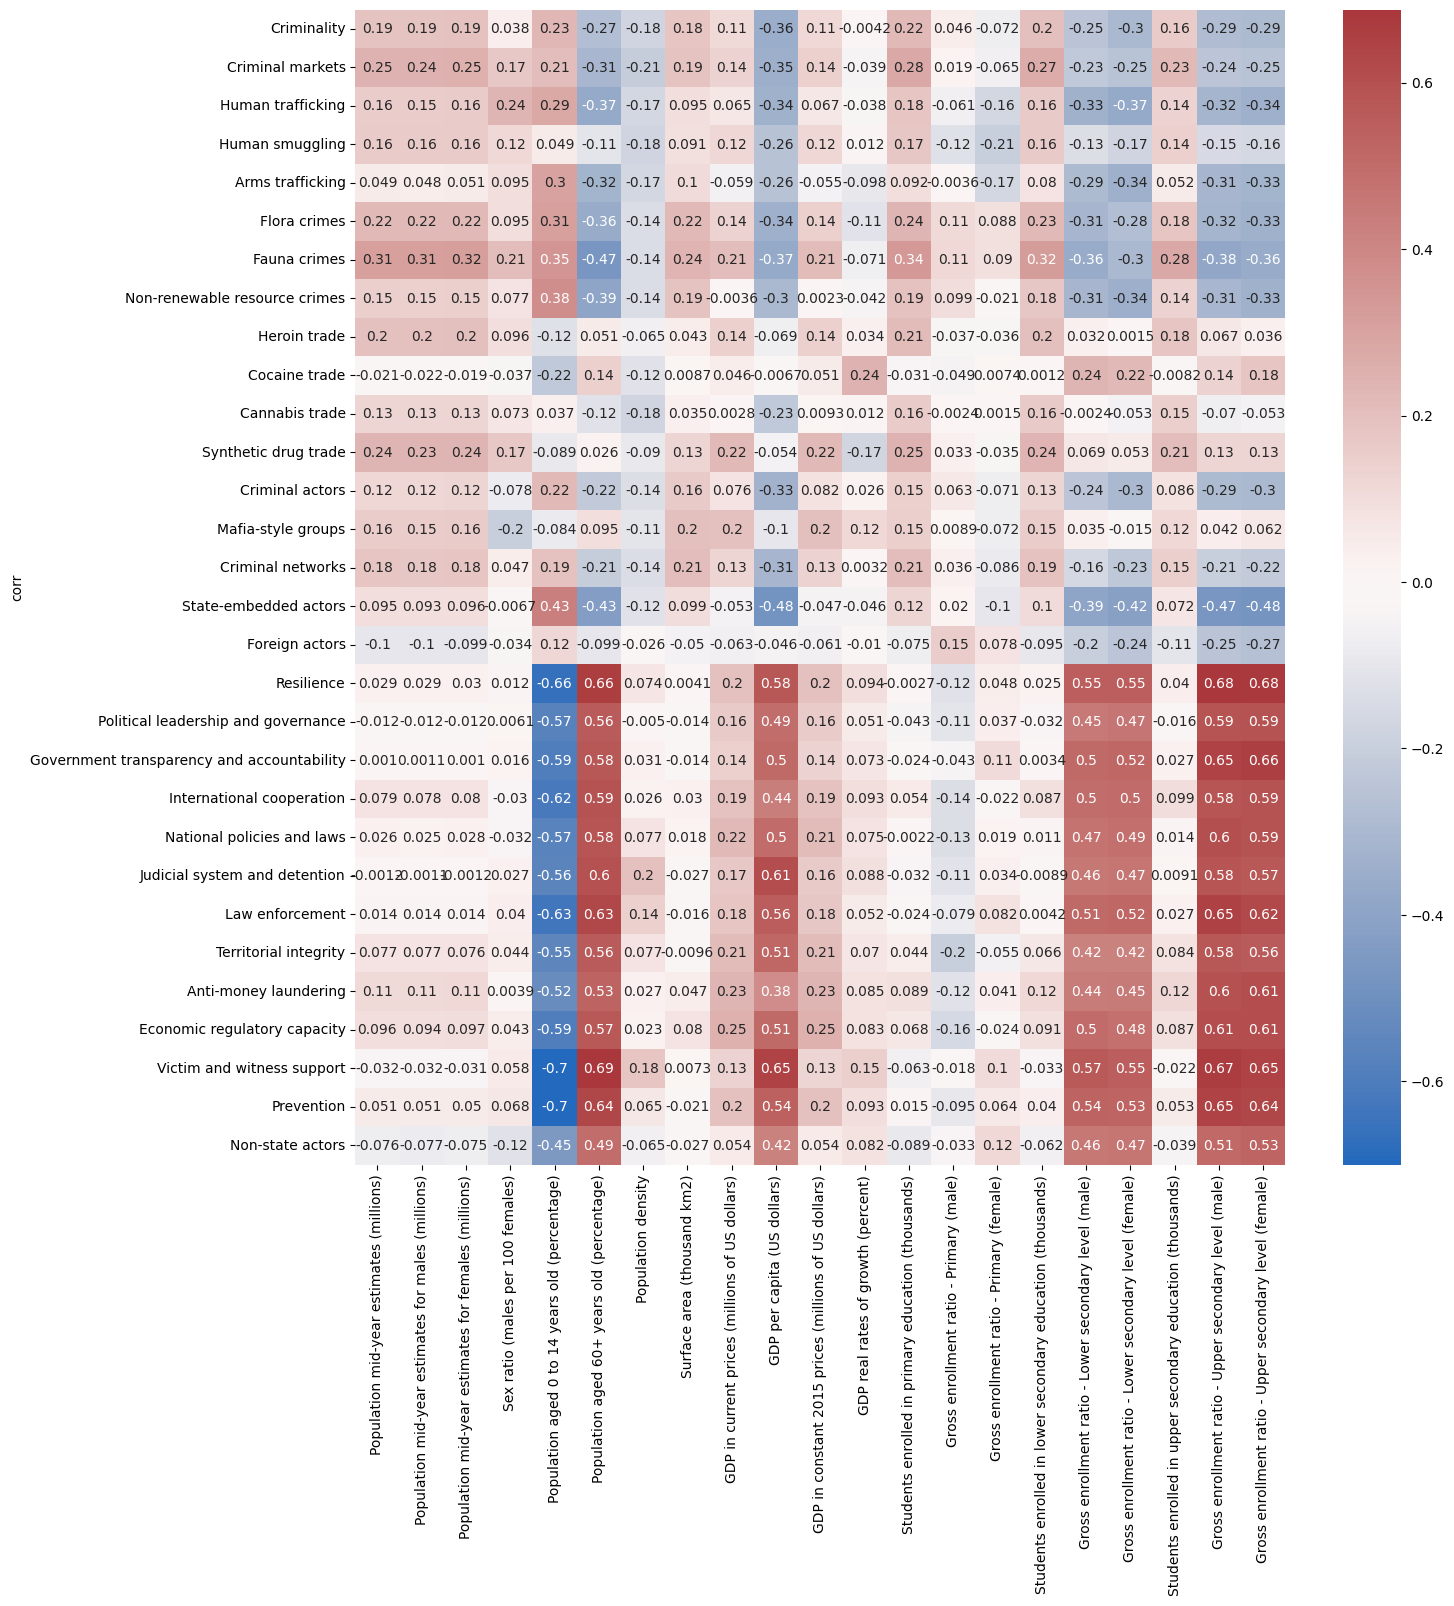

In [27]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_last), cmap="vlag",annot=True)

<Axes: ylabel='corr'>

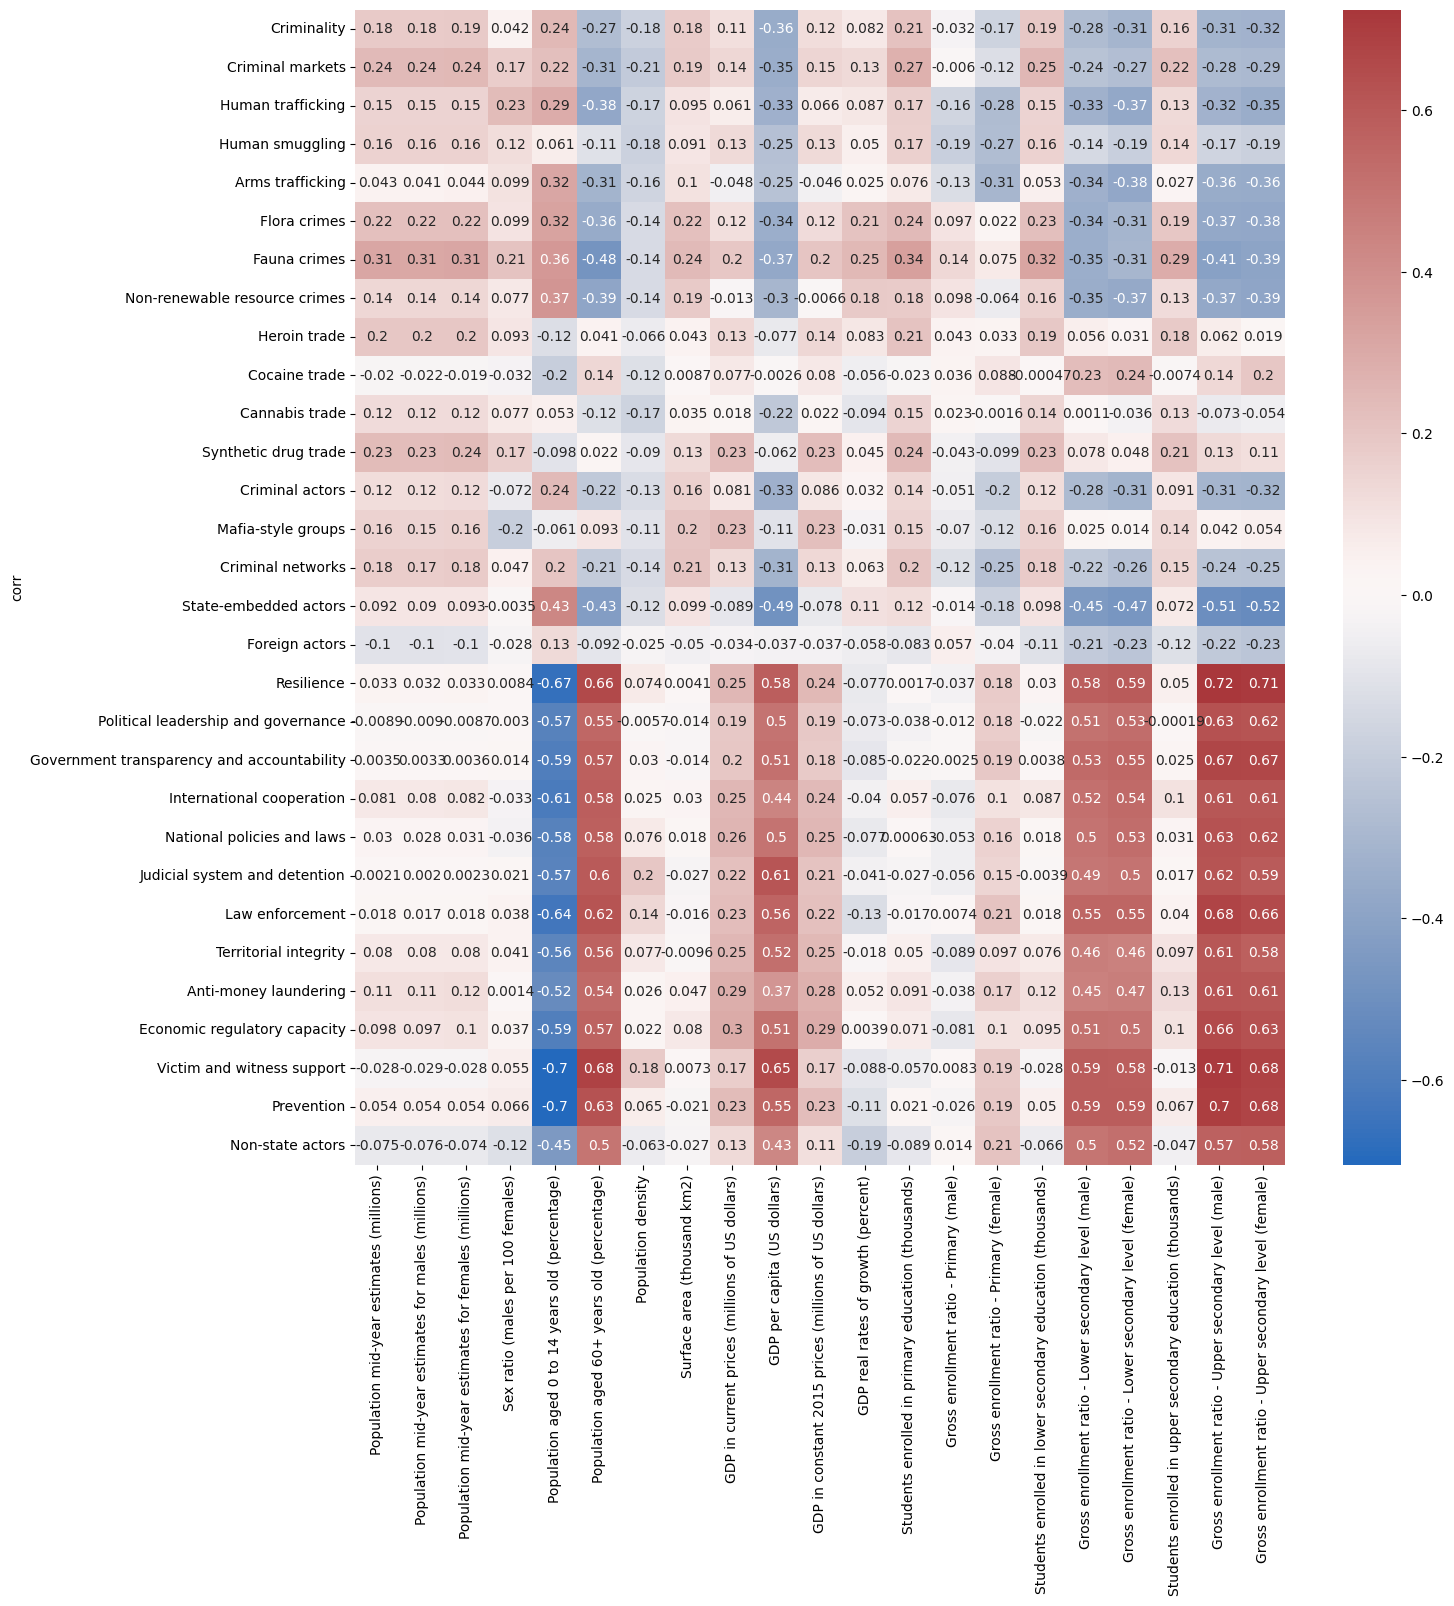

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_mean), cmap="vlag",annot=True)

There is higher correlation with dataset that based on mean values of parameters, so we will use it, instead of most recent data.

Thus, we will drop all the resilience and criminality types that we won't use:

In [37]:
df_total_mean_res = df_crime.select(pl.col("Continent", "Region", "Country", "Criminality", "Resilience")).join(df_population_mean, on="Country")
df_total_mean_res = df_total_mean_res.join(df_gdp_mean, on="Country")
df_total_mean_res = df_total_mean_res.join(df_edu_mean, on="Country")

Now we will look at the final correlation heatmap:

<Axes: ylabel='corr'>

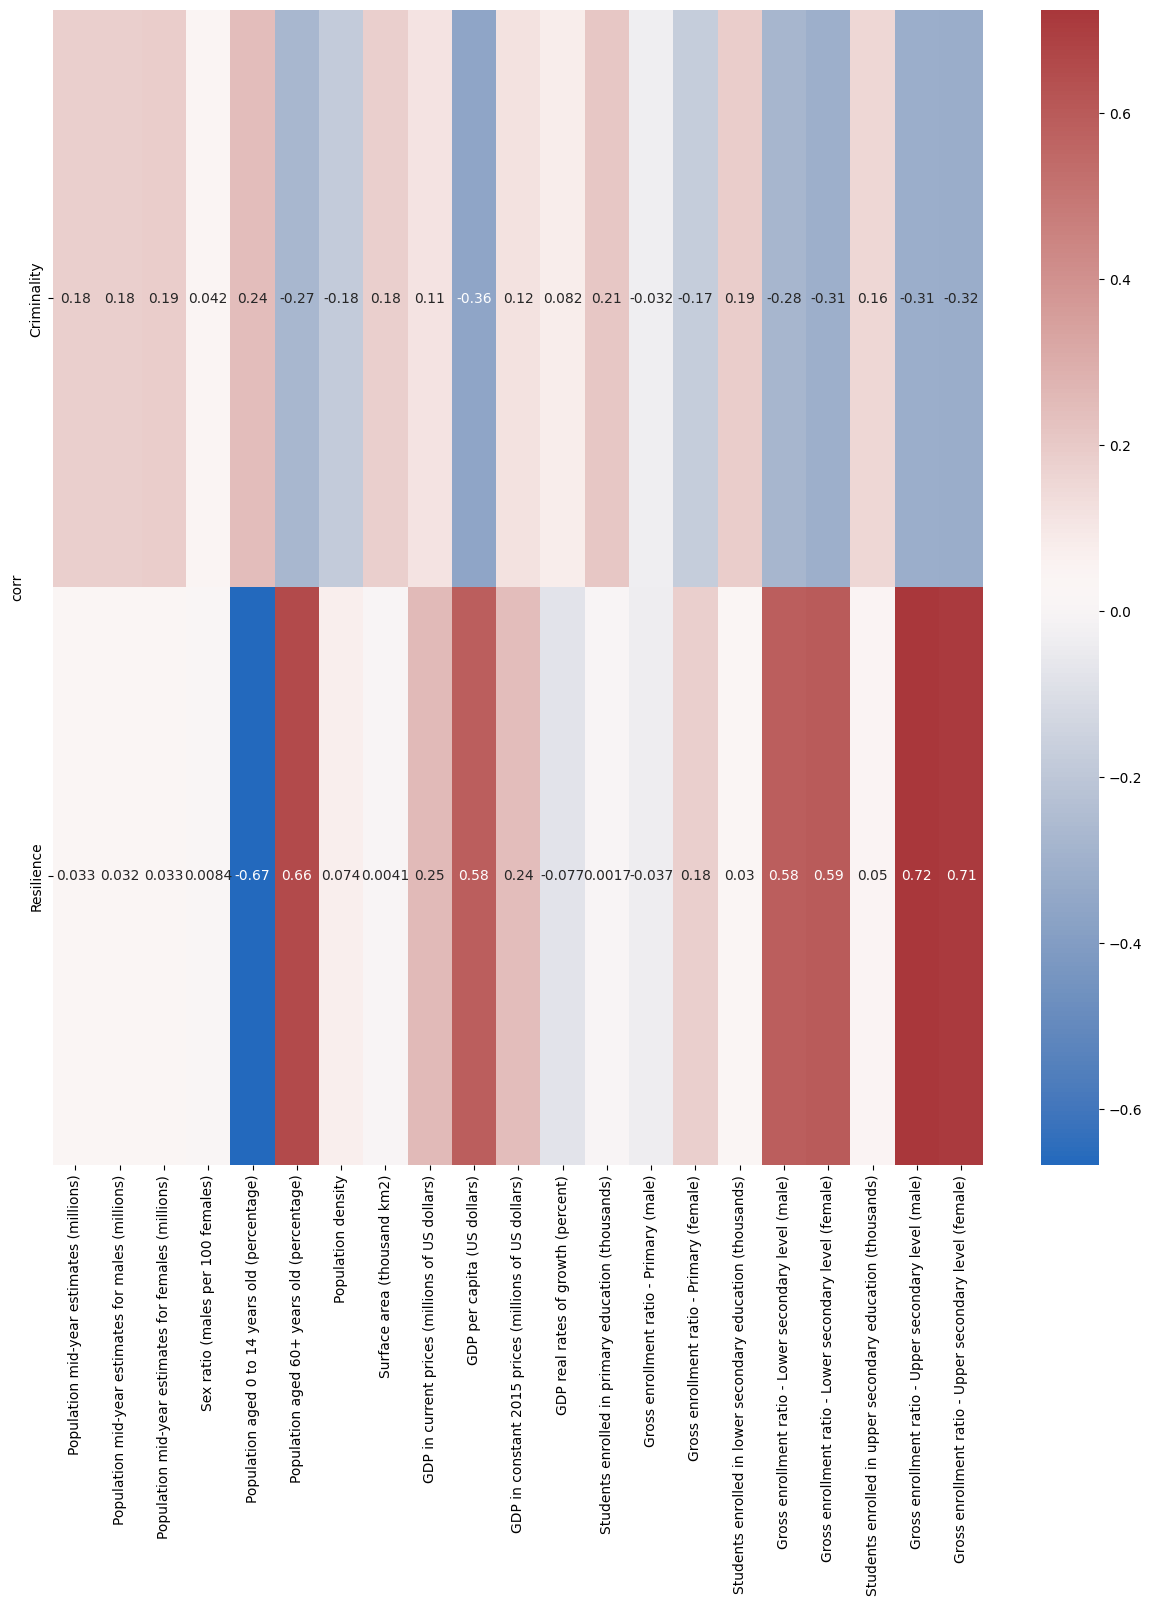

In [30]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total_mean_res, col=2), cmap="vlag",annot=True)

## Finding and exploring outliers in the dataset:

### Pairplots between target and each feature:

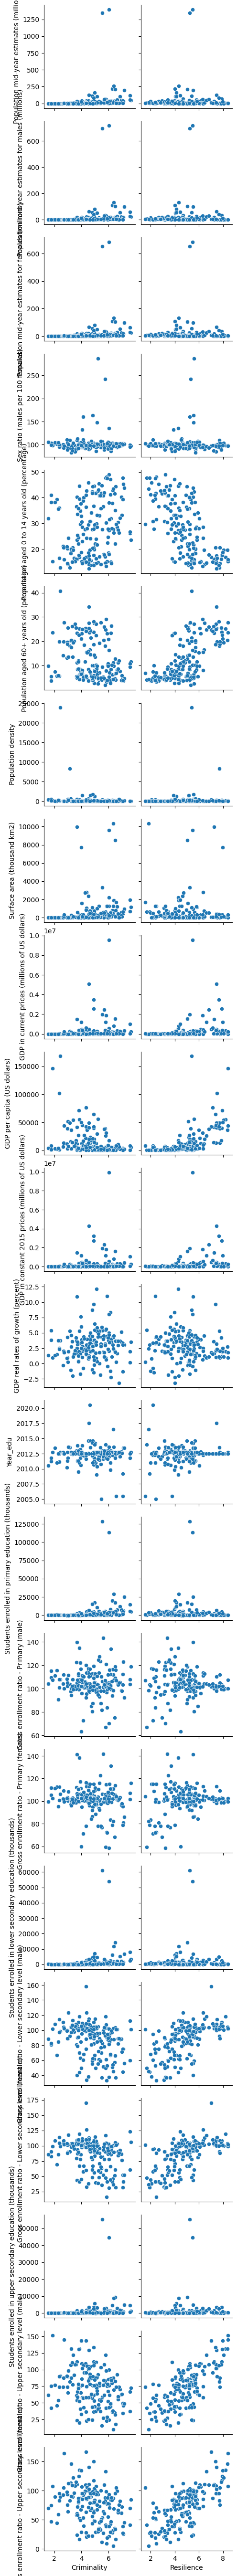

In [39]:
data_curr = df_total_mean_res.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp"])).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[0:2],
    y_vars = data_curr.columns[2:],
)

### Using Isolation Forest:

In [40]:
from sklearn.ensemble import IsolationForest
data_curr = df_total_mean_res.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])).to_pandas()

model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.03),random_state=0)
model.fit(data_curr)

df_total_mean_res = df_total_mean_res.with_columns(pl.Series(model.predict(data_curr)).alias("IsoForestResult"))
df_total_mean_res = df_total_mean_res.select(pl.exclude(["Continent","Region","Year_pop","Year_gdp", "Year_edu"]))
df_total_mean_res

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


shape: (169, 25)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ Country   ┆ Criminali ┆ Resilienc ┆ Populatio ┆ … ┆ Students  ┆ Gross enr ┆ Gross enr ┆ IsoFores │
│ ---       ┆ ty        ┆ e         ┆ n         ┆   ┆ enrolled  ┆ ollment   ┆ ollment   ┆ tResult  │
│ str       ┆ ---       ┆ ---       ┆ mid-year  ┆   ┆ in upper  ┆ ratio -   ┆ ratio -   ┆ ---      │
│           ┆ f64       ┆ f64       ┆ estimates ┆   ┆ secon…    ┆ Upper s…  ┆ Upper s…  ┆ i64      │
│           ┆           ┆           ┆ (m…       ┆   ┆ ---       ┆ ---       ┆ ---       ┆          │
│           ┆           ┆           ┆ ---       ┆   ┆ f64       ┆ f64       ┆ f64       ┆          │
│           ┆           ┆           ┆ f64       ┆   ┆           ┆           ┆           ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ Eswatini  ┆ 3.63      ┆ 3.25      ┆ 1.155     ┆ … ┆ 75.613258 ┆ 60.740528 ┆ 58.547974 ┆ 1        │
│ Fiji      ┆ 3.9       ┆ 5.25      ┆ 0.92      ┆ … ┆ 51.705012 ┆ 75.470174 ┆ 87.029869 ┆ 1        │
│ Poland    ┆ 4.01      ┆ 6.13      ┆ 38.83     ┆ … ┆ 1568.4    ┆ 109.2     ┆ 107.14    ┆ 1        │
│ Seychelle ┆ 3.68      ┆ 4.58      ┆ 0.1025    ┆ … ┆ 3.25      ┆ 53.85     ┆ 61.2      ┆ 1        │
│ s         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ …         ┆ …         ┆ …         ┆ …         ┆ … ┆ …         ┆ …         ┆ …         ┆ …        │
│ Bahrain   ┆ 4.83      ┆ 5.54      ┆ 1.375     ┆ … ┆ 39.8      ┆ 89.76     ┆ 98.86     ┆ 1        │
│ Austria   ┆ 4.04      ┆ 7.42      ┆ 8.715     ┆ … ┆ 368.75    ┆ 101.9     ┆ 95.325    ┆ 1        │
│ Australia ┆ 4.0       ┆ 7.96      ┆ 24.485    ┆ … ┆ 1041.3107 ┆ 143.63051 ┆ 134.45081 ┆ 1        │
│           ┆           ┆           ┆           ┆   ┆ 97        ┆           ┆           ┆          │
│ Germany   ┆ 4.9       ┆ 7.67      ┆ 82.545    ┆ … ┆ 2638.25   ┆ 106.3     ┆ 95.625    ┆ 1        │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

### Pairplots between target and each feature before and after drop of outliers:

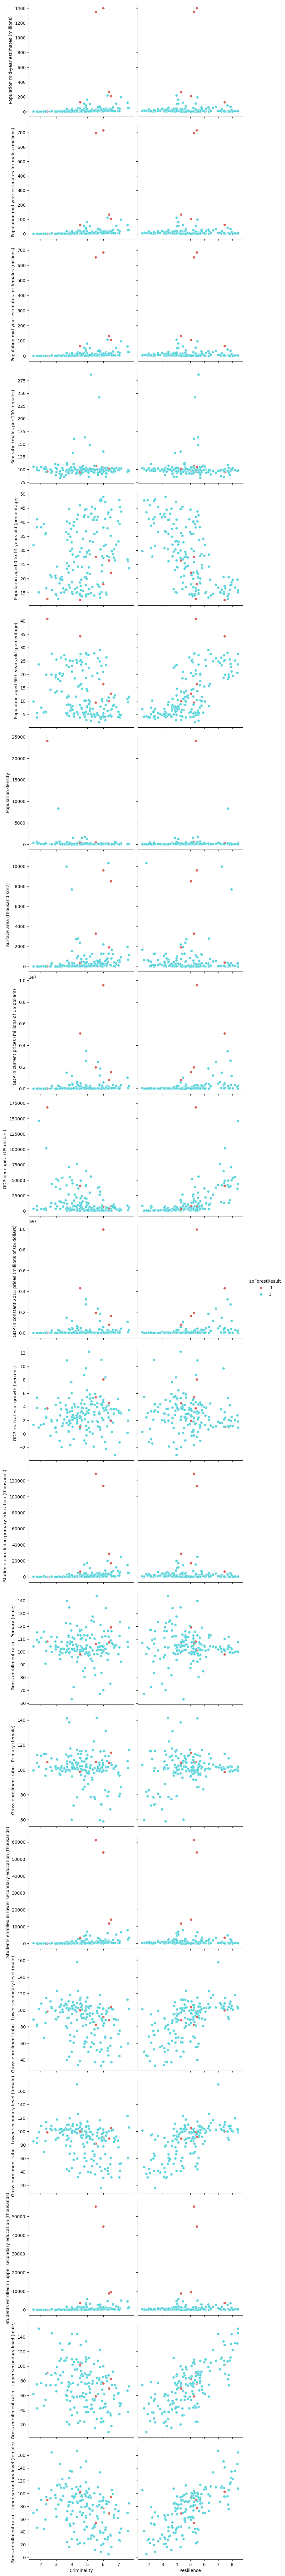

In [41]:
data_curr = df_total_mean_res.to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[1, 2]],
    y_vars = data_curr.columns[3:-1],
    hue = "IsoForestResult",
    palette = sns.color_palette("hls", 2),
    height = 4
) # Pairplot before, with outliers marked with red color

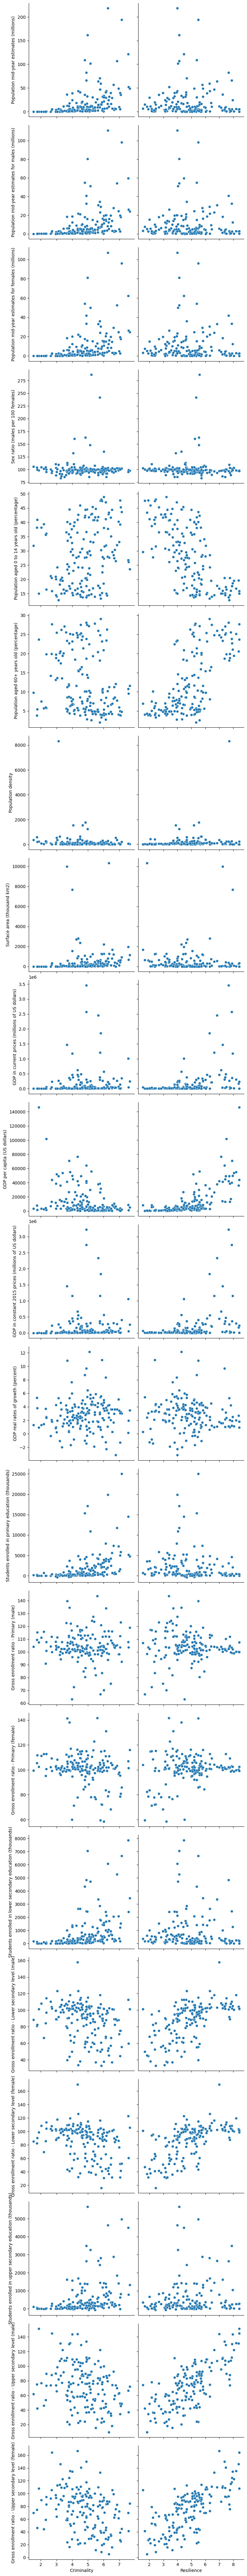

In [42]:
data_curr = df_total_mean_res.filter(pl.col("IsoForestResult") == 1).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[1, 2]],
    y_vars = data_curr.columns[3:-1],
    height = 4
) # Pairplot after drop of outliers

### Saving the data as parquet file:

In [43]:
df_total_mean_res = df_total_mean_res.filter(pl.col("IsoForestResult") == 1)
df_total_mean_res.select(pl.exclude(["IsoForestResult"])).write_parquet('clean_data.parquet') # This is the final look of data after preprocessing, so save as parquet file for future analysis

## Exploring Feature Selection Methods through correlation with the crime dataset and colinearity(Not efficient, so not used in future analysis):

### Manual

In [ ]:
df_feature_selection = df_total_mean.drop(["Population mid-year estimates (millions)",
                                               "Population mid-year estimates for males (millions)",
                                               "Population mid-year estimates for females (millions)","Sex ratio (males per 100 females)",
                                               "Sex ratio (males per 100 females)",
                                               "Surface area (thousand km2)",
                                               "Students enrolled in primary education (thousands)",
                                               "Gross enrollment ratio - Primary (male)",
                                               "Students enrolled in lower secondary education (thousands)"])
df_feature_selection_res = df_total_mean_res.drop(["Population mid-year estimates (millions)",
                                               "Population mid-year estimates for males (millions)",
                                               "Population mid-year estimates for females (millions)","Sex ratio (males per 100 females)",
                                               "Sex ratio (males per 100 females)",
                                               "Surface area (thousand km2)",
                                               "Students enrolled in primary education (thousands)",
                                               "Gross enrollment ratio - Primary (male)",
                                               "Students enrolled in lower secondary education (thousands)"])

In [ ]:
def colinearity(df):
  X =df.drop(["Criminality", "Resilience","Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])
  Y = df.select(["Criminality", "Resilience"])
  corr = X.corr().to_pandas()
  corr["corr"] = corr.columns
  corr.set_index("corr",inplace=True)
  plt.figure(figsize=(10,10))
  sns.heatmap(corr, cmap="vlag",annot=True)

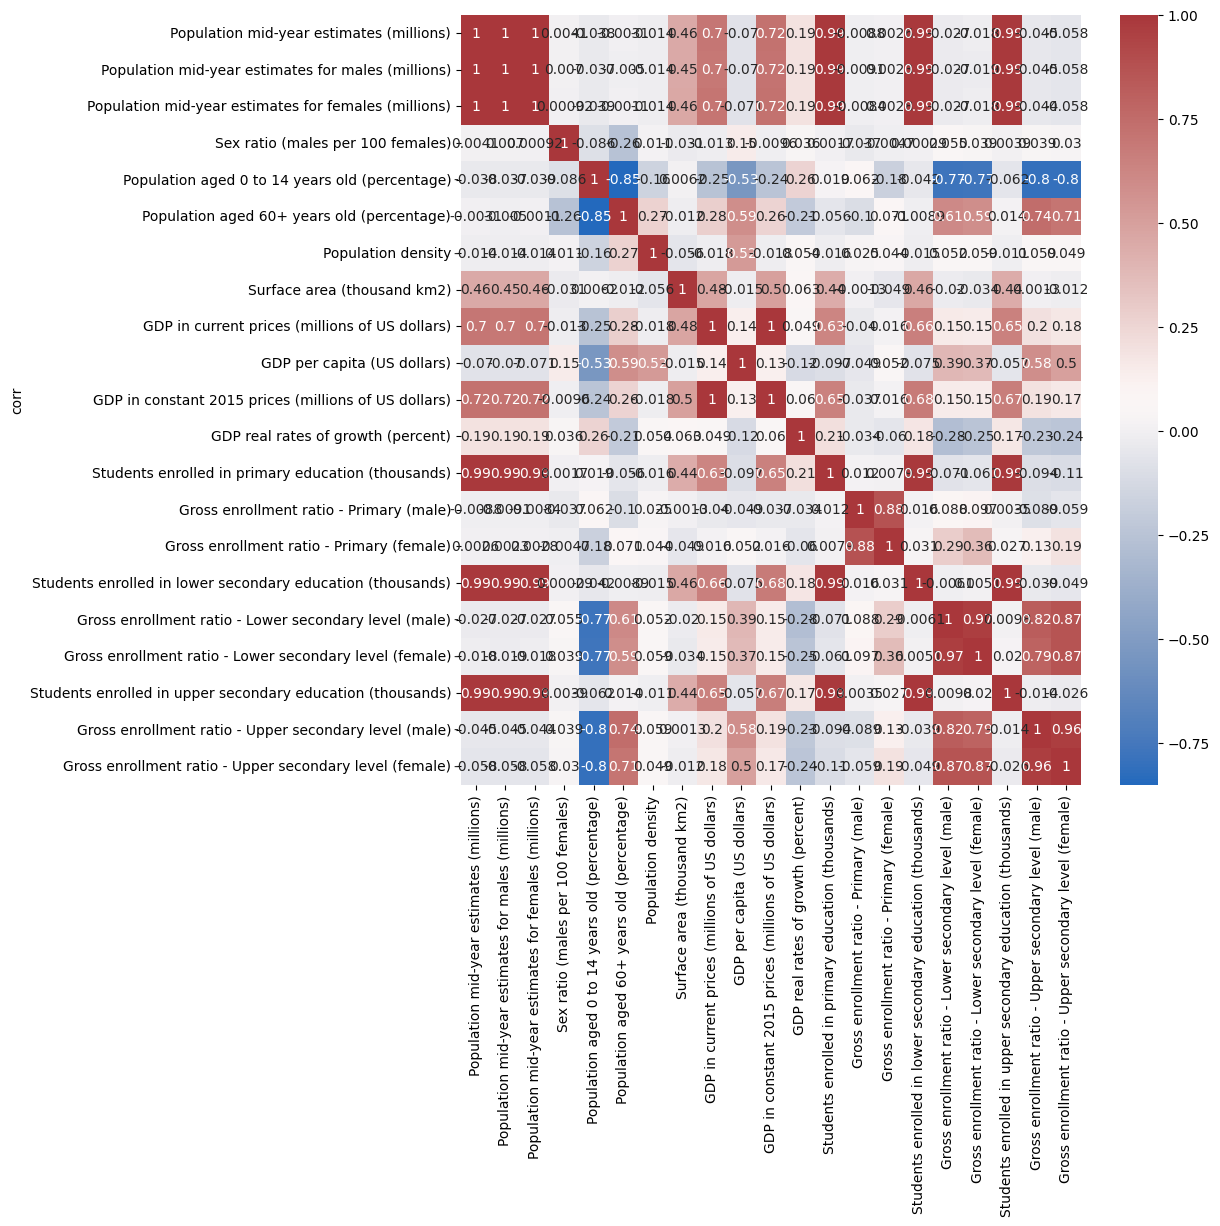

In [ ]:
colinearity(df_total_mean_res)

### Using Sequental Forward Feature Selection:

In [ ]:
X =df_total_mean_res.drop(["Criminality", "Resilience","Continent","Region","Country","Year_pop","Year_gdp", "Year_edu"])
Y = df_total_mean_res.select(["Criminality", "Resilience"])
ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, Y)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(X,Y)
X_selected = X[:,sfs_forward.get_support()]

In [ ]:
sfs_forward.get_feature_names_out()

array(['Sex ratio (males per 100 females)',
       'Population aged 0 to 14 years old (percentage)',
       'Population aged 60+ years old (percentage)',
       'Surface area (thousand km2)',
       'GDP real rates of growth (percent)',
       'Students enrolled in primary education (thousands)',
       'Gross enrollment ratio - Primary (male)',
       'Gross enrollment ratio - Primary (female)',
       'Students enrolled in upper secondary education (thousands)',
       'Gross enrollment ratio - Upper secondary level (male)'],
      dtype=object)

In [ ]:
df_selected_forward = df_total_mean_res.select(["Country", "Criminality", "Resilience",*sfs_forward.get_feature_names_out()])

In [ ]:
df_selected_forward.shape

(169, 13)

<Axes: ylabel='corr'>

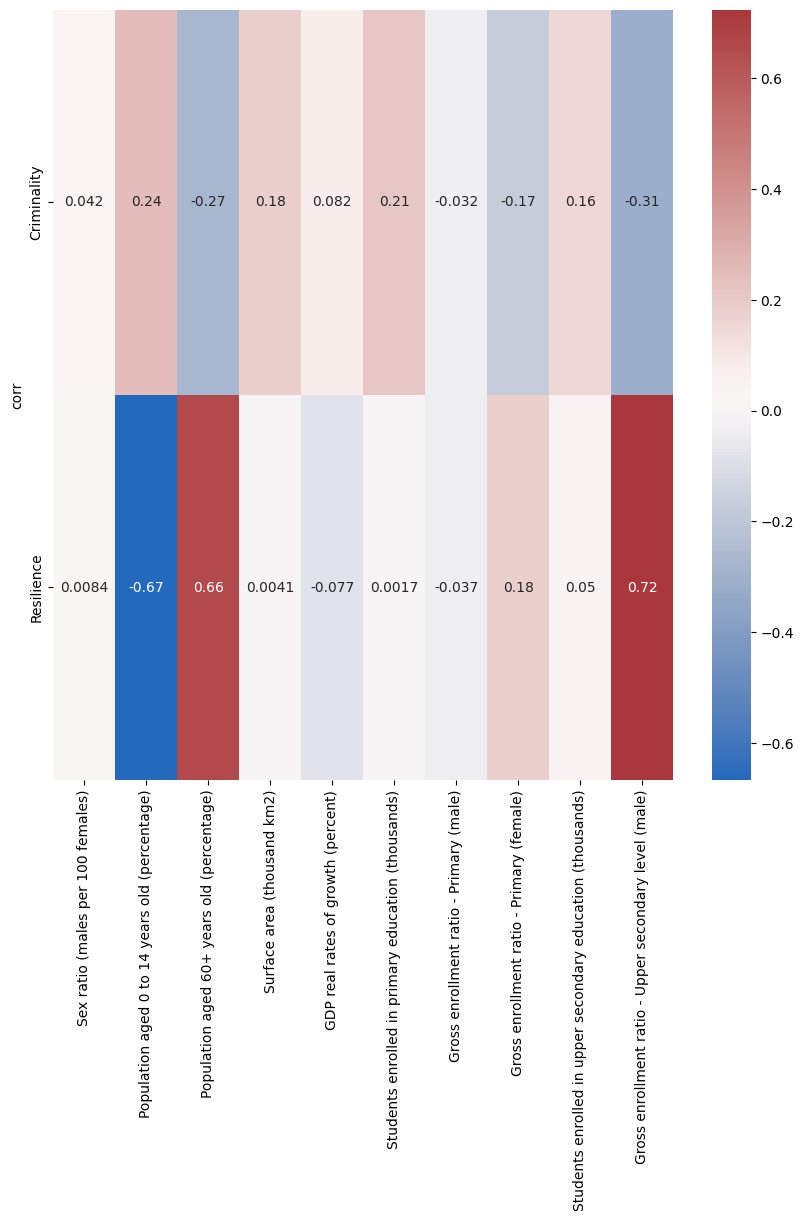

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(crime_corr(df_selected_forward, 2), cmap="vlag",annot=True)

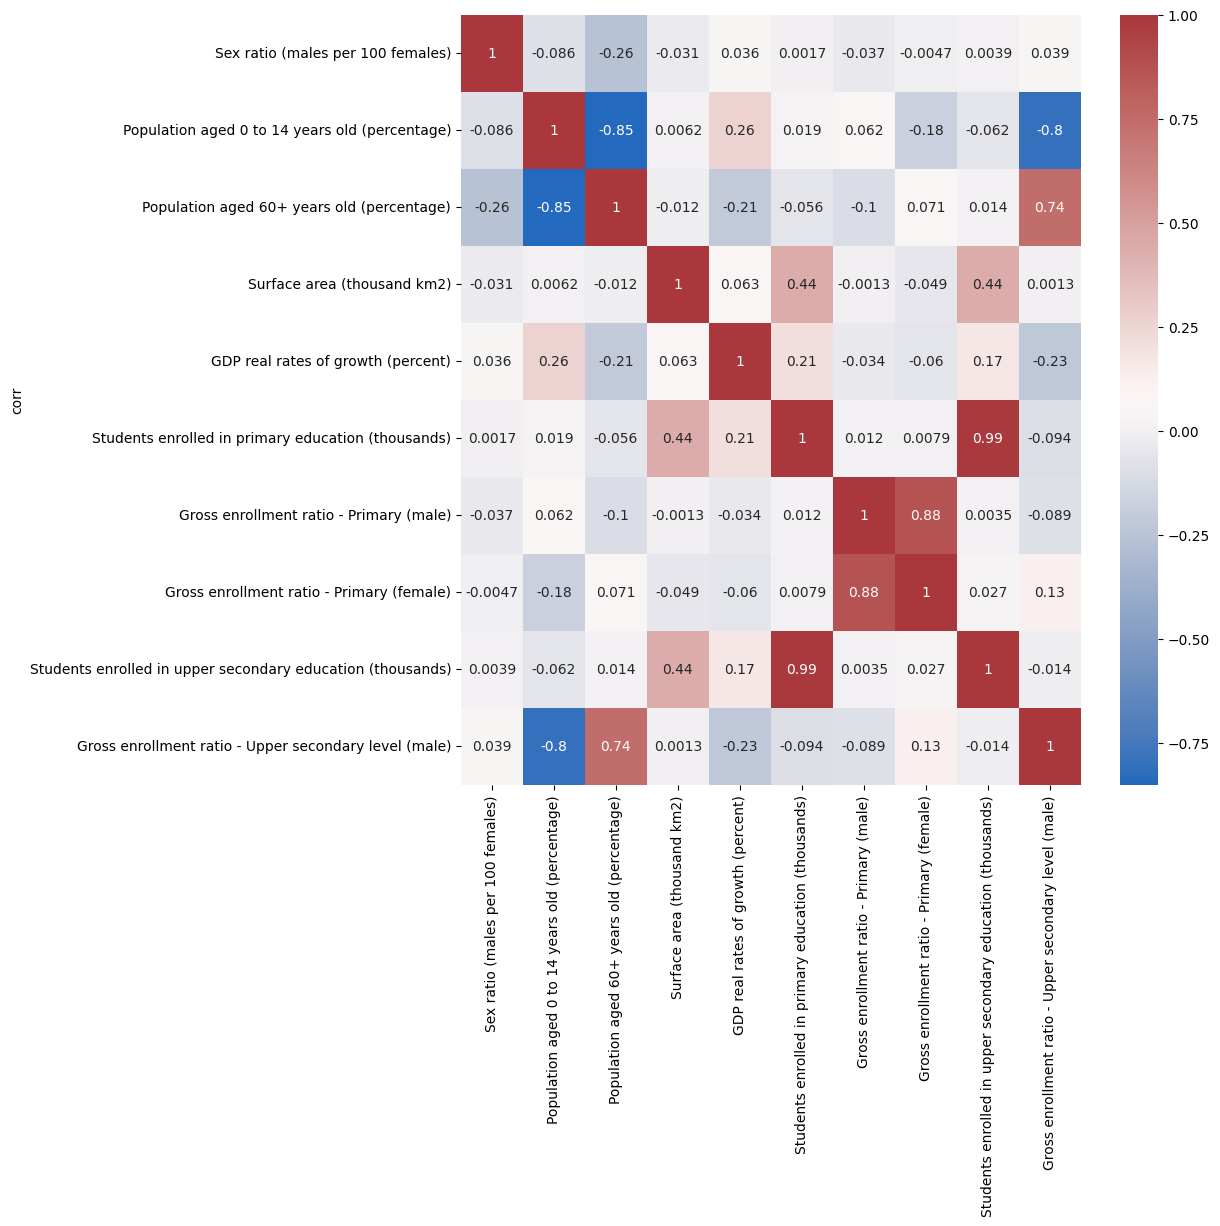

In [ ]:
colinearity(df_selected_forward)

(169, 19)


<Axes: ylabel='corr'>

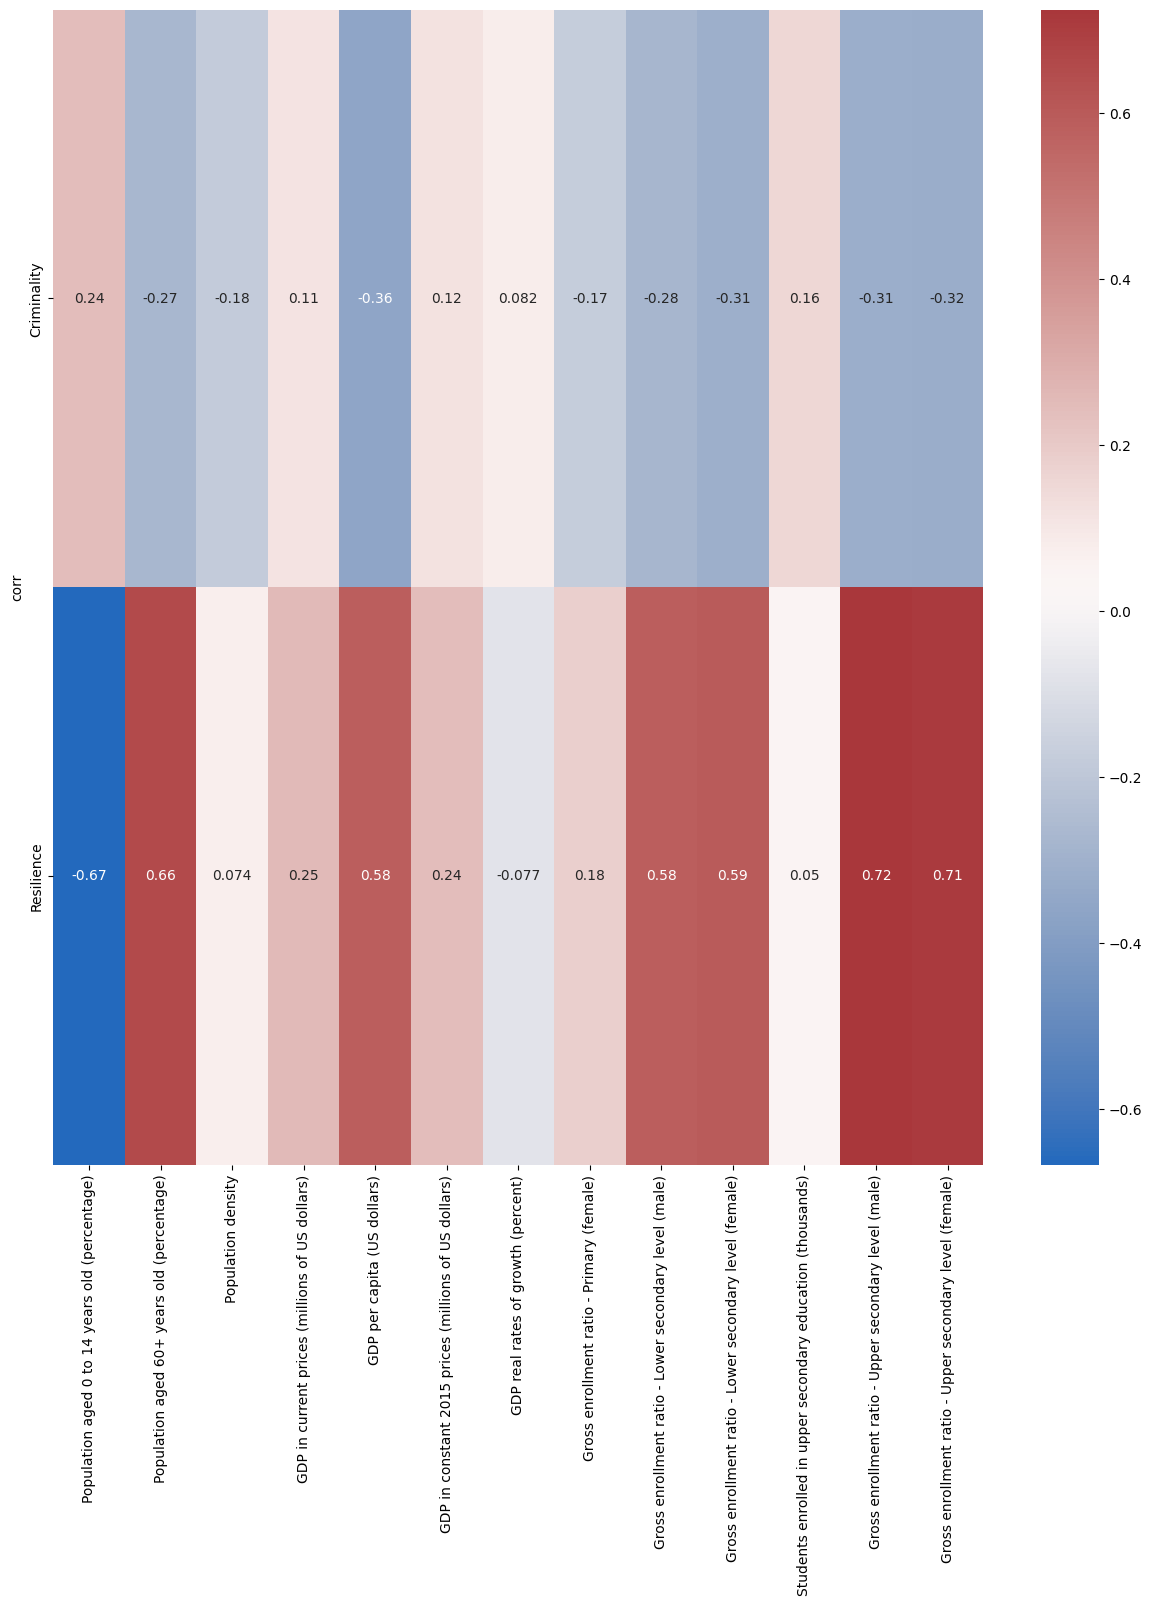

In [ ]:
print(df_feature_selection_res.drop(["Region","Continent"]).shape)
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_feature_selection_res, col=2), cmap="vlag",annot=True)

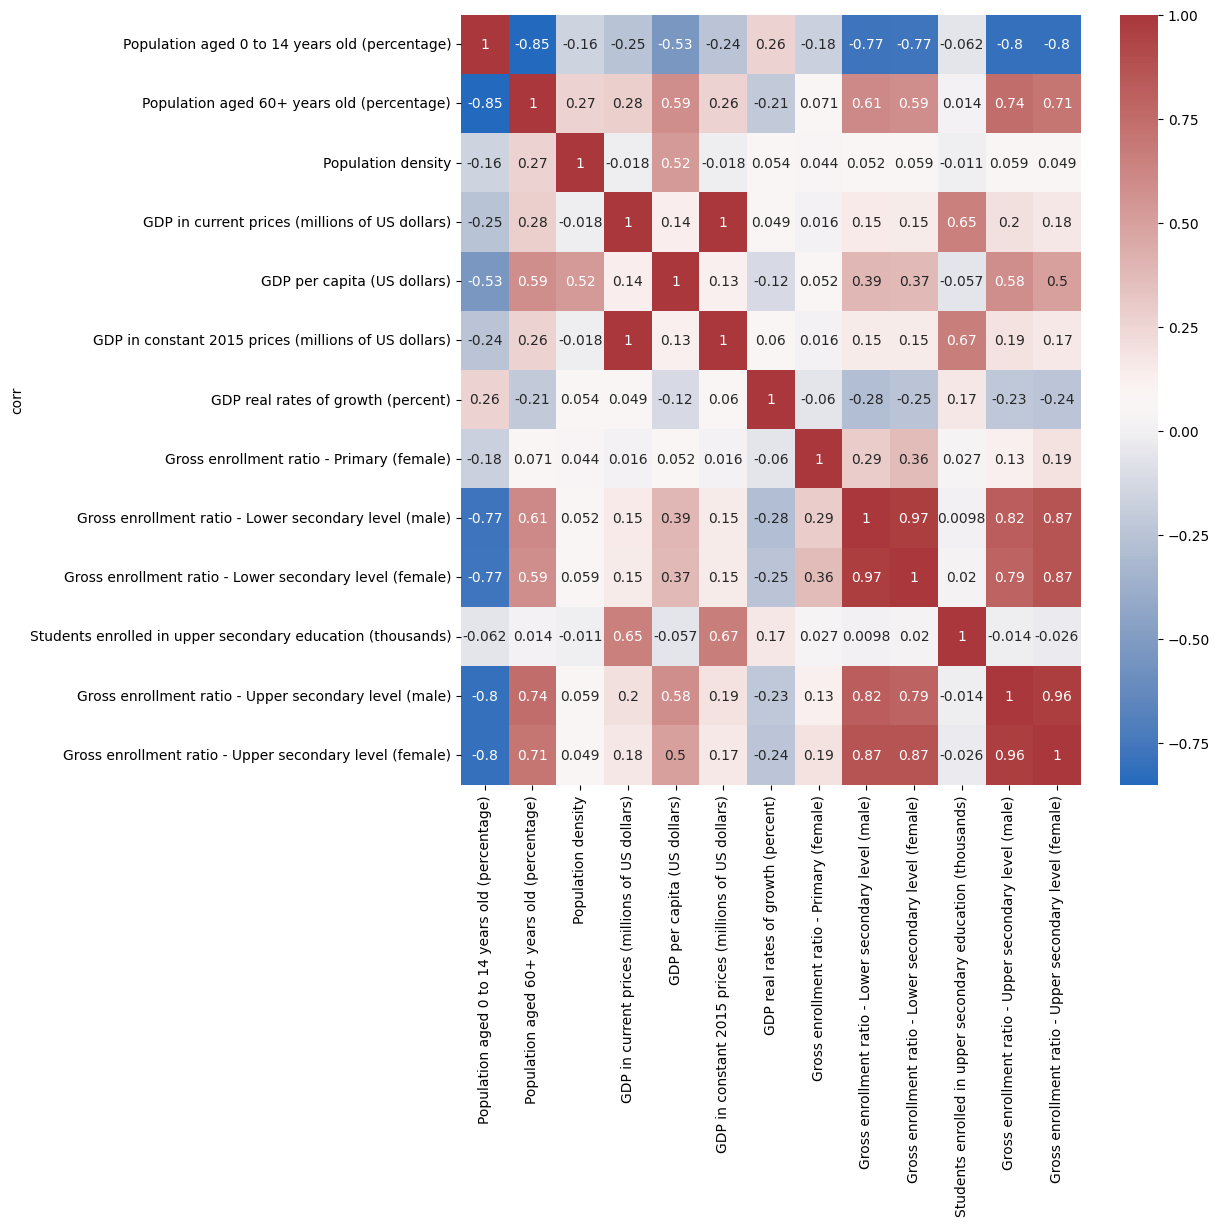

In [ ]:
colinearity(df_feature_selection_res)

<Axes: ylabel='corr'>

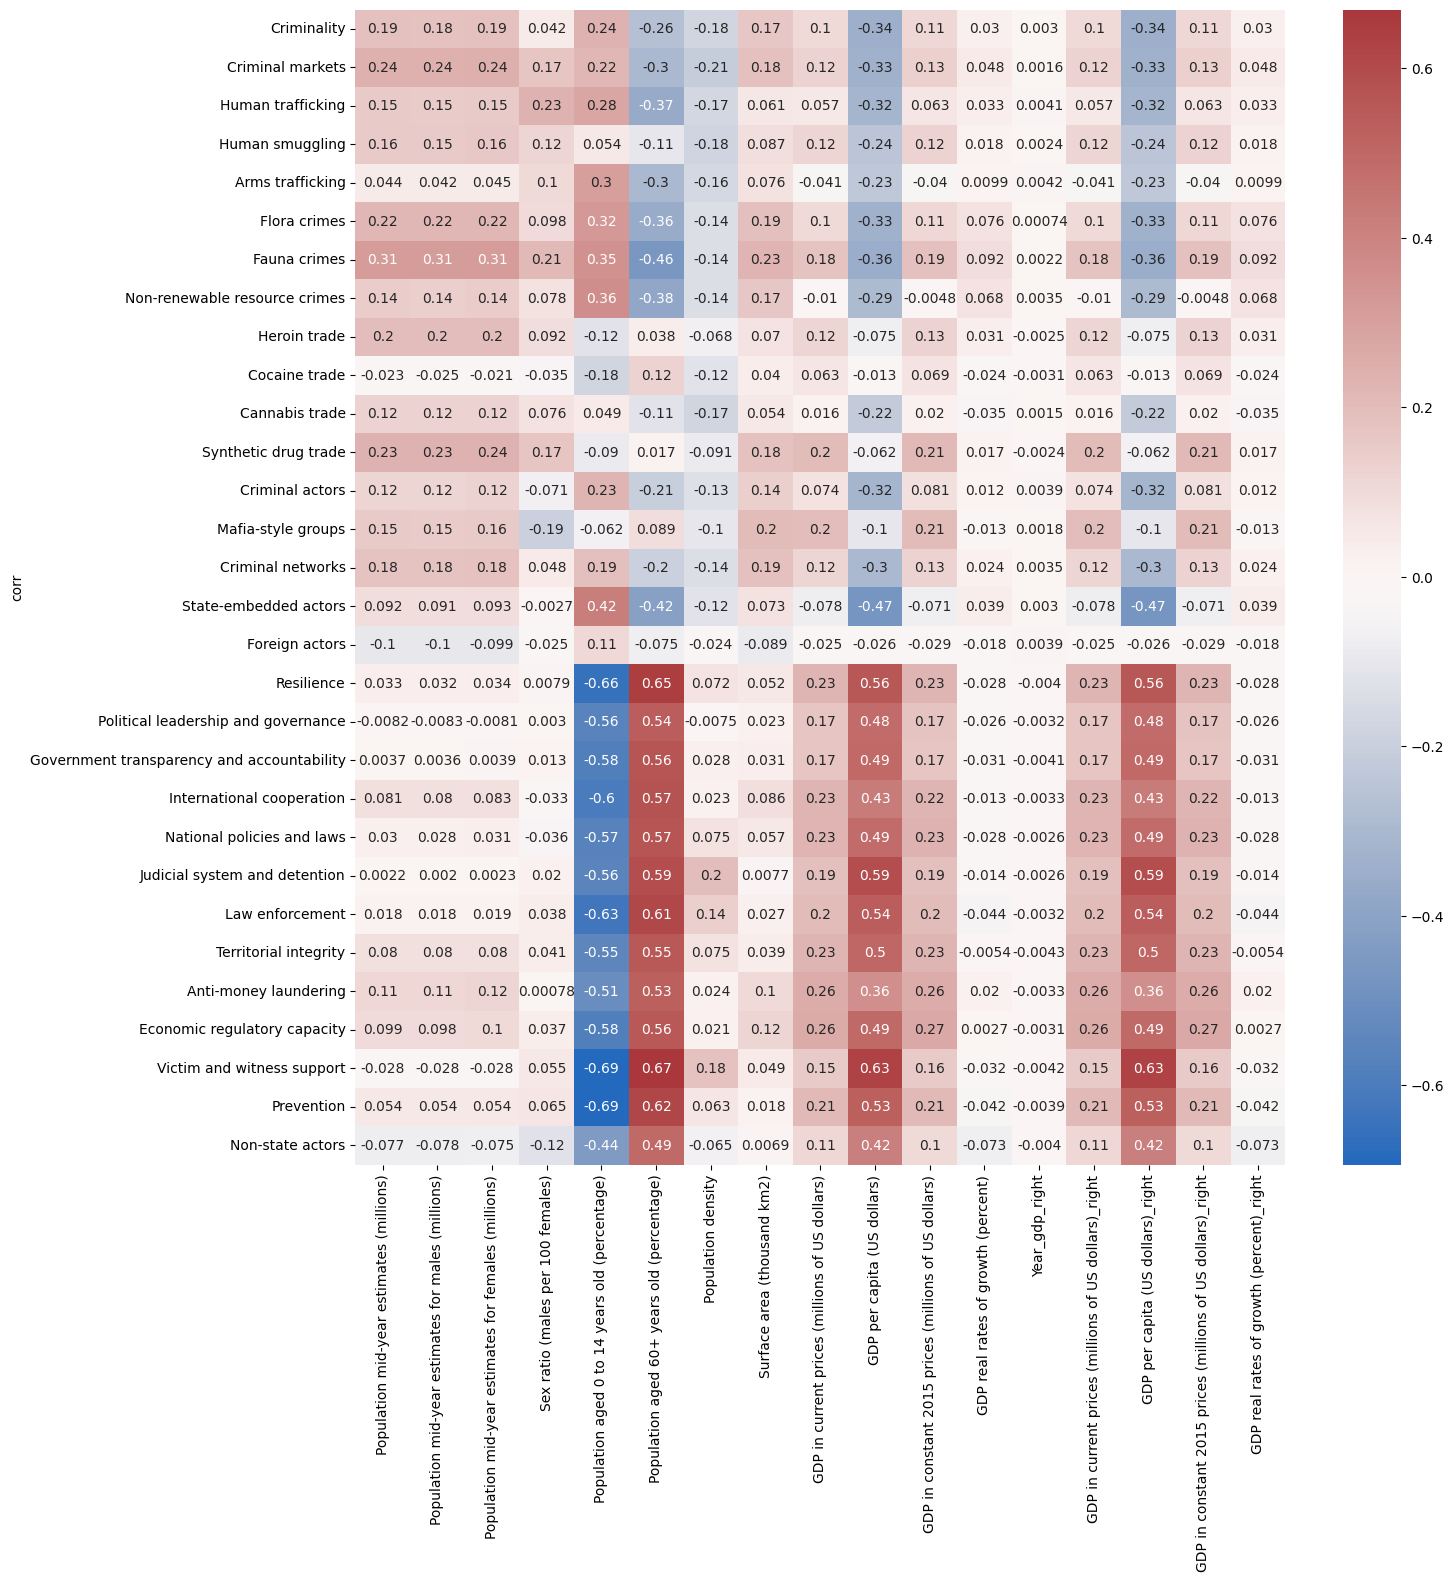

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(crime_corr(df_total), cmap="vlag",annot=True)

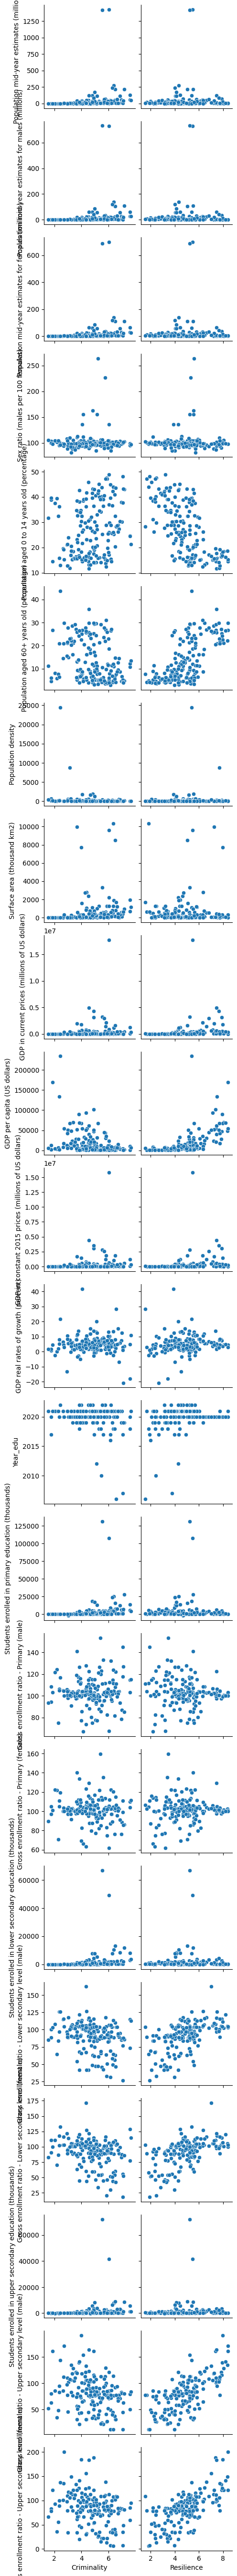

In [ ]:
data_curr = df_total_last.select(pl.exclude(["Continent","Region","Country","Year_pop","Year_gdp"])).to_pandas()
sns.pairplot(
    data_curr,
    x_vars = data_curr.columns[[0, 17]],
    y_vars = data_curr.columns[30:],
)

## Searching and exploring data biases:

### Criminality distribution between continets(geographical bias)

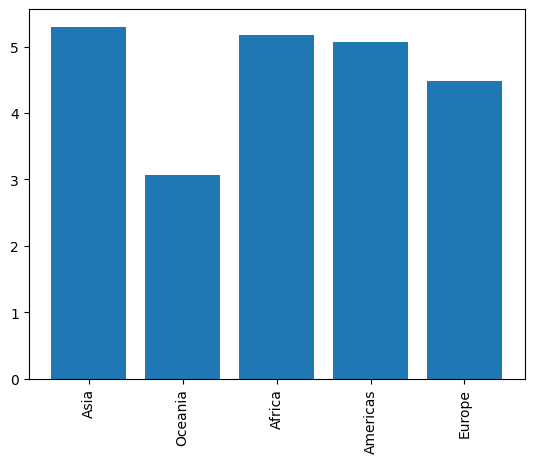

In [ ]:
x = df_crime.group_by('Continent').agg(pl.col("Criminality").mean())

plt.bar(x["Continent"],x["Criminality"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()

### Compare year distributions among education and population datasets(historical bias)

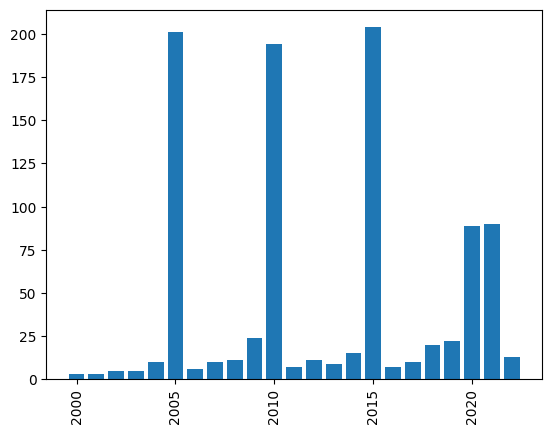

In [ ]:
year_dist = df_edu.group_by('Year_edu').count()
plt.bar(year_dist["Year_edu"],year_dist["count"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()

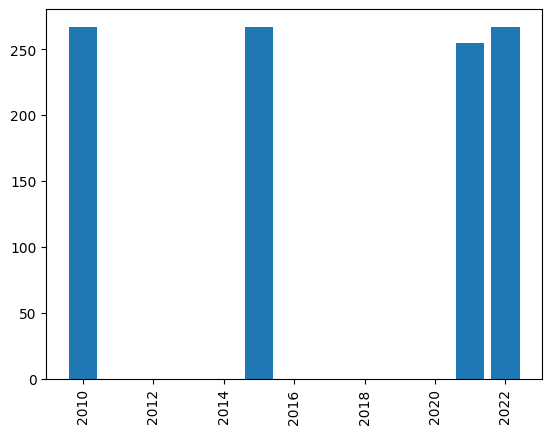

In [ ]:
year_dist = df_population.group_by('Year_pop').count()
plt.bar(year_dist["Year_pop"],year_dist["count"])
plt.xticks(
    rotation=90,
    fontweight='light',
)
plt.show()